<a href="https://colab.research.google.com/github/sudipsiwakoti/Assignment_2/blob/master/Assignment2_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```

```



In [0]:
#importing libraries  

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_1samp

from sklearn import datasets, linear_model, metrics 


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


In [23]:
#importing dataset into dataframe

url = "https://raw.githubusercontent.com/sudipsiwakoti/Assignment_2/master/Melbourne_housing_FULL.csv"
dataset= pd.read_csv(url)
dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [24]:
dataset=dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           8887 non-null object
Address          8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.5+ MB


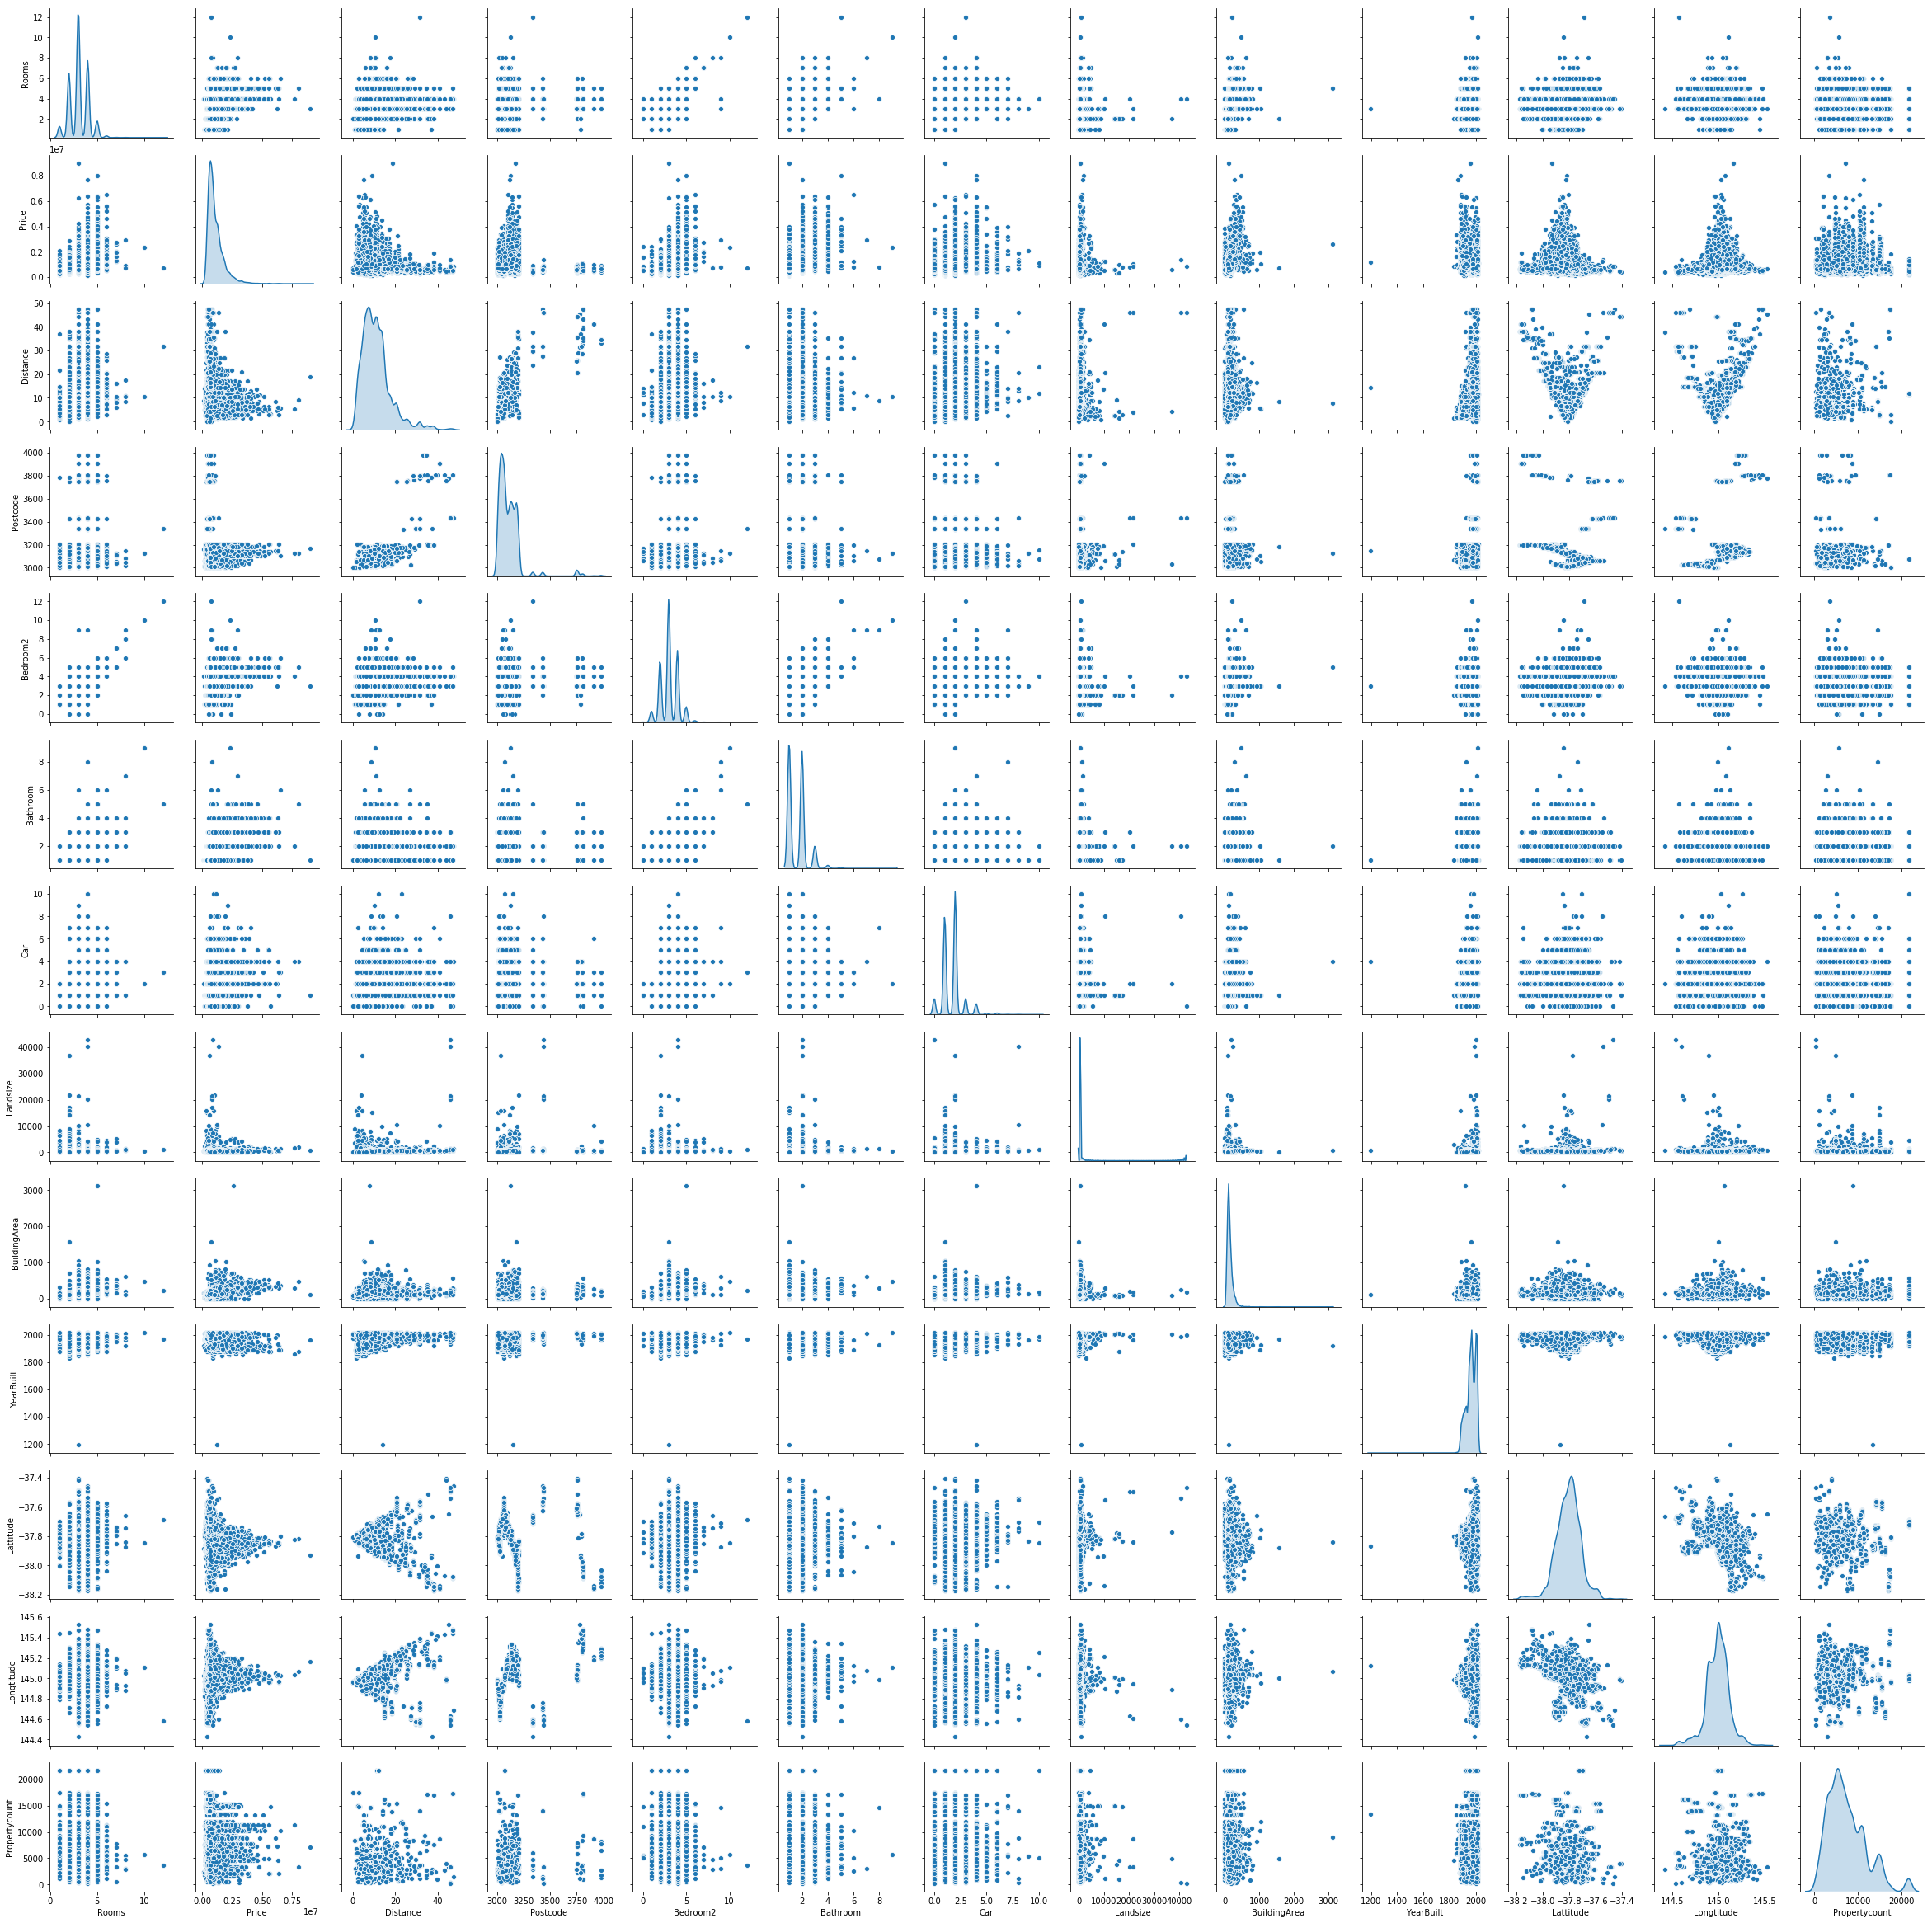

In [25]:
#visualising dataset to find outliers in dataset using seaborn pairplot
sns.pairplot(dataset, diag_kind='kde')

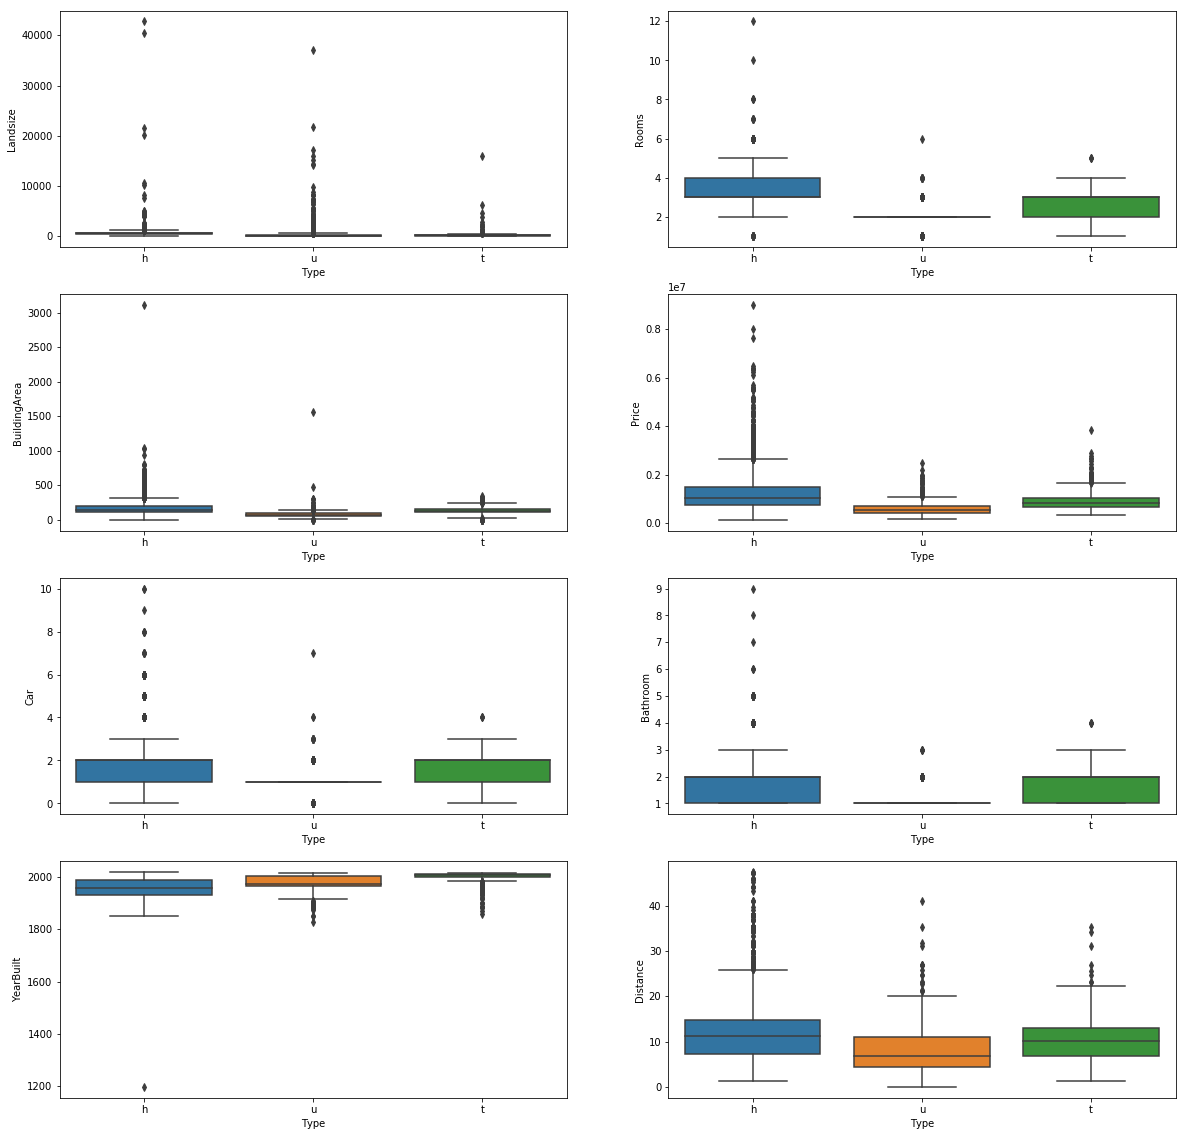

In [26]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))
  
sns.boxplot(x=dataset.Type, y=dataset.Rooms, data=dataset, orient='v' , ax=axes[0,1],)
sns.boxplot( x=dataset.Type, y=dataset.Landsize, data=dataset,orient='v' , ax=axes[0,0])
sns.boxplot( x=dataset.Type, y=dataset.BuildingArea, data=dataset, orient='v' , ax=axes[1,0])
sns.boxplot(  x=dataset.Type, y=dataset.Price, data=dataset, orient='v' , ax=axes[1,1])
sns.boxplot(  x=dataset.Type, y=dataset.Car, data=dataset, orient='v' , ax=axes[2,0])
sns.boxplot(  x=dataset.Type, y=dataset.Bathroom, data=dataset, orient='v' , ax=axes[2,1])
sns.boxplot(  x=dataset.Type, y=dataset.YearBuilt, data=dataset, orient='v' , ax=axes[3,0])
sns.boxplot(  x=dataset.Type, y=dataset.Distance, data=dataset, orient='v' , ax=axes[3,1])

In [0]:
#removing outliers
dataset= dataset.drop(dataset[(dataset.Car >7) | (dataset.Price >8000000) |
                              (dataset.Bathroom >3) | (dataset.YearBuilt < 1855)
                             | (dataset.YearBuilt > 2020) | (dataset.Landsize>1000)
                             |(dataset.BuildingArea>1000)|(dataset.Distance>30)|(dataset.Rooms>8)].index)

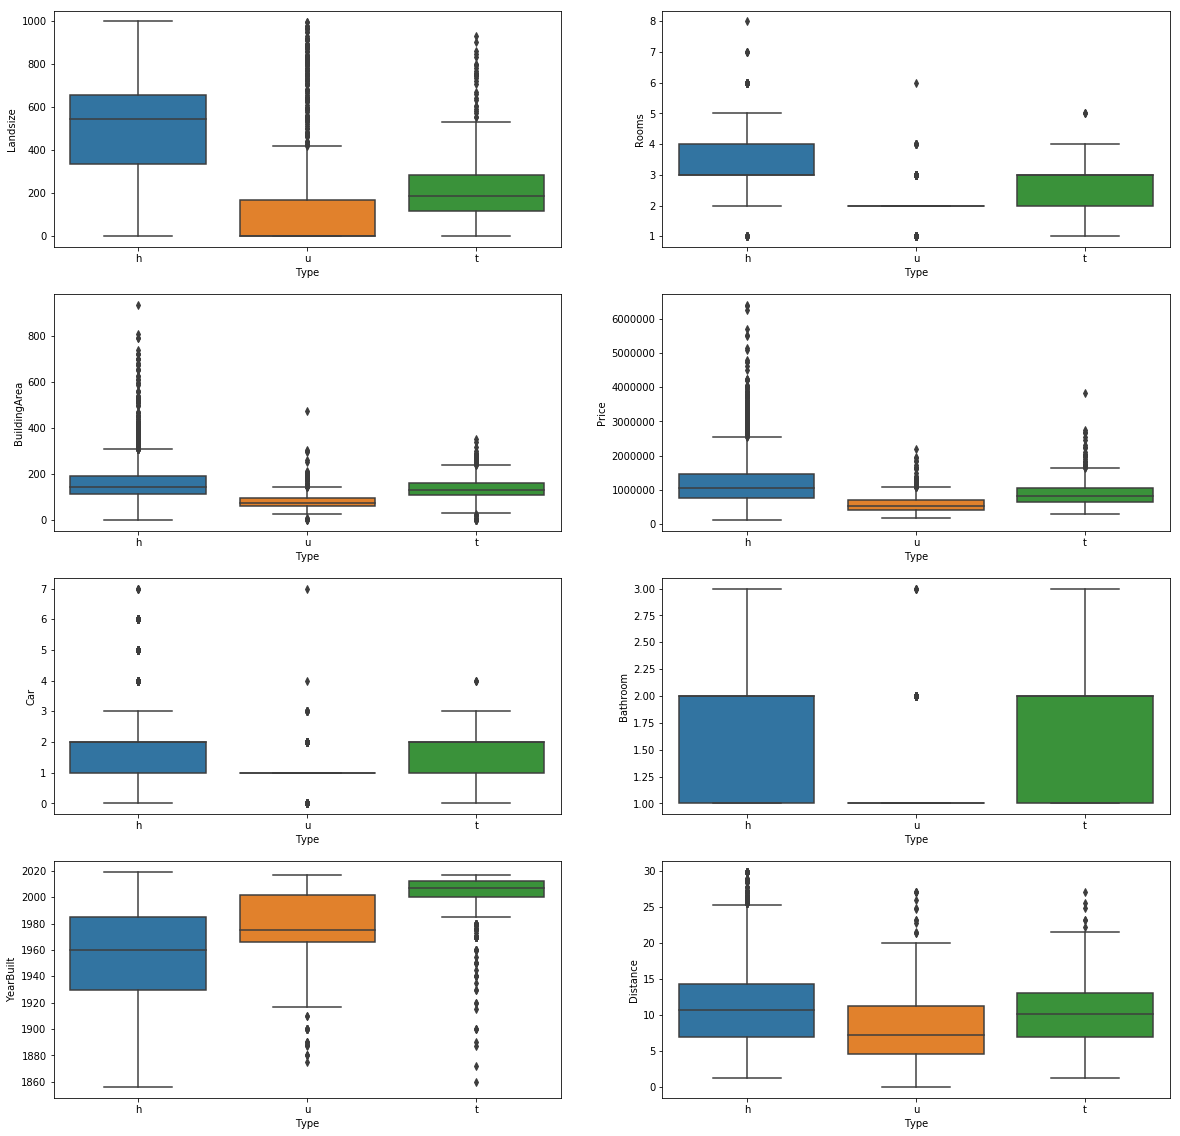

In [28]:
f, axes = plt.subplots(4, 2, figsize=(20, 20))
  
sns.boxplot(x=dataset.Type, y=dataset.Rooms, data=dataset, orient='v' , ax=axes[0,1],)
sns.boxplot( x=dataset.Type, y=dataset.Landsize, data=dataset,orient='v' , ax=axes[0,0])
sns.boxplot( x=dataset.Type, y=dataset.BuildingArea, data=dataset, orient='v' , ax=axes[1,0])
sns.boxplot(  x=dataset.Type, y=dataset.Price, data=dataset, orient='v' , ax=axes[1,1])
sns.boxplot(  x=dataset.Type, y=dataset.Car, data=dataset, orient='v' , ax=axes[2,0])
sns.boxplot(  x=dataset.Type, y=dataset.Bathroom, data=dataset, orient='v' , ax=axes[2,1])
sns.boxplot(  x=dataset.Type, y=dataset.YearBuilt, data=dataset, orient='v' , ax=axes[3,0])
sns.boxplot(  x=dataset.Type, y=dataset.Distance, data=dataset, orient='v' , ax=axes[3,1])

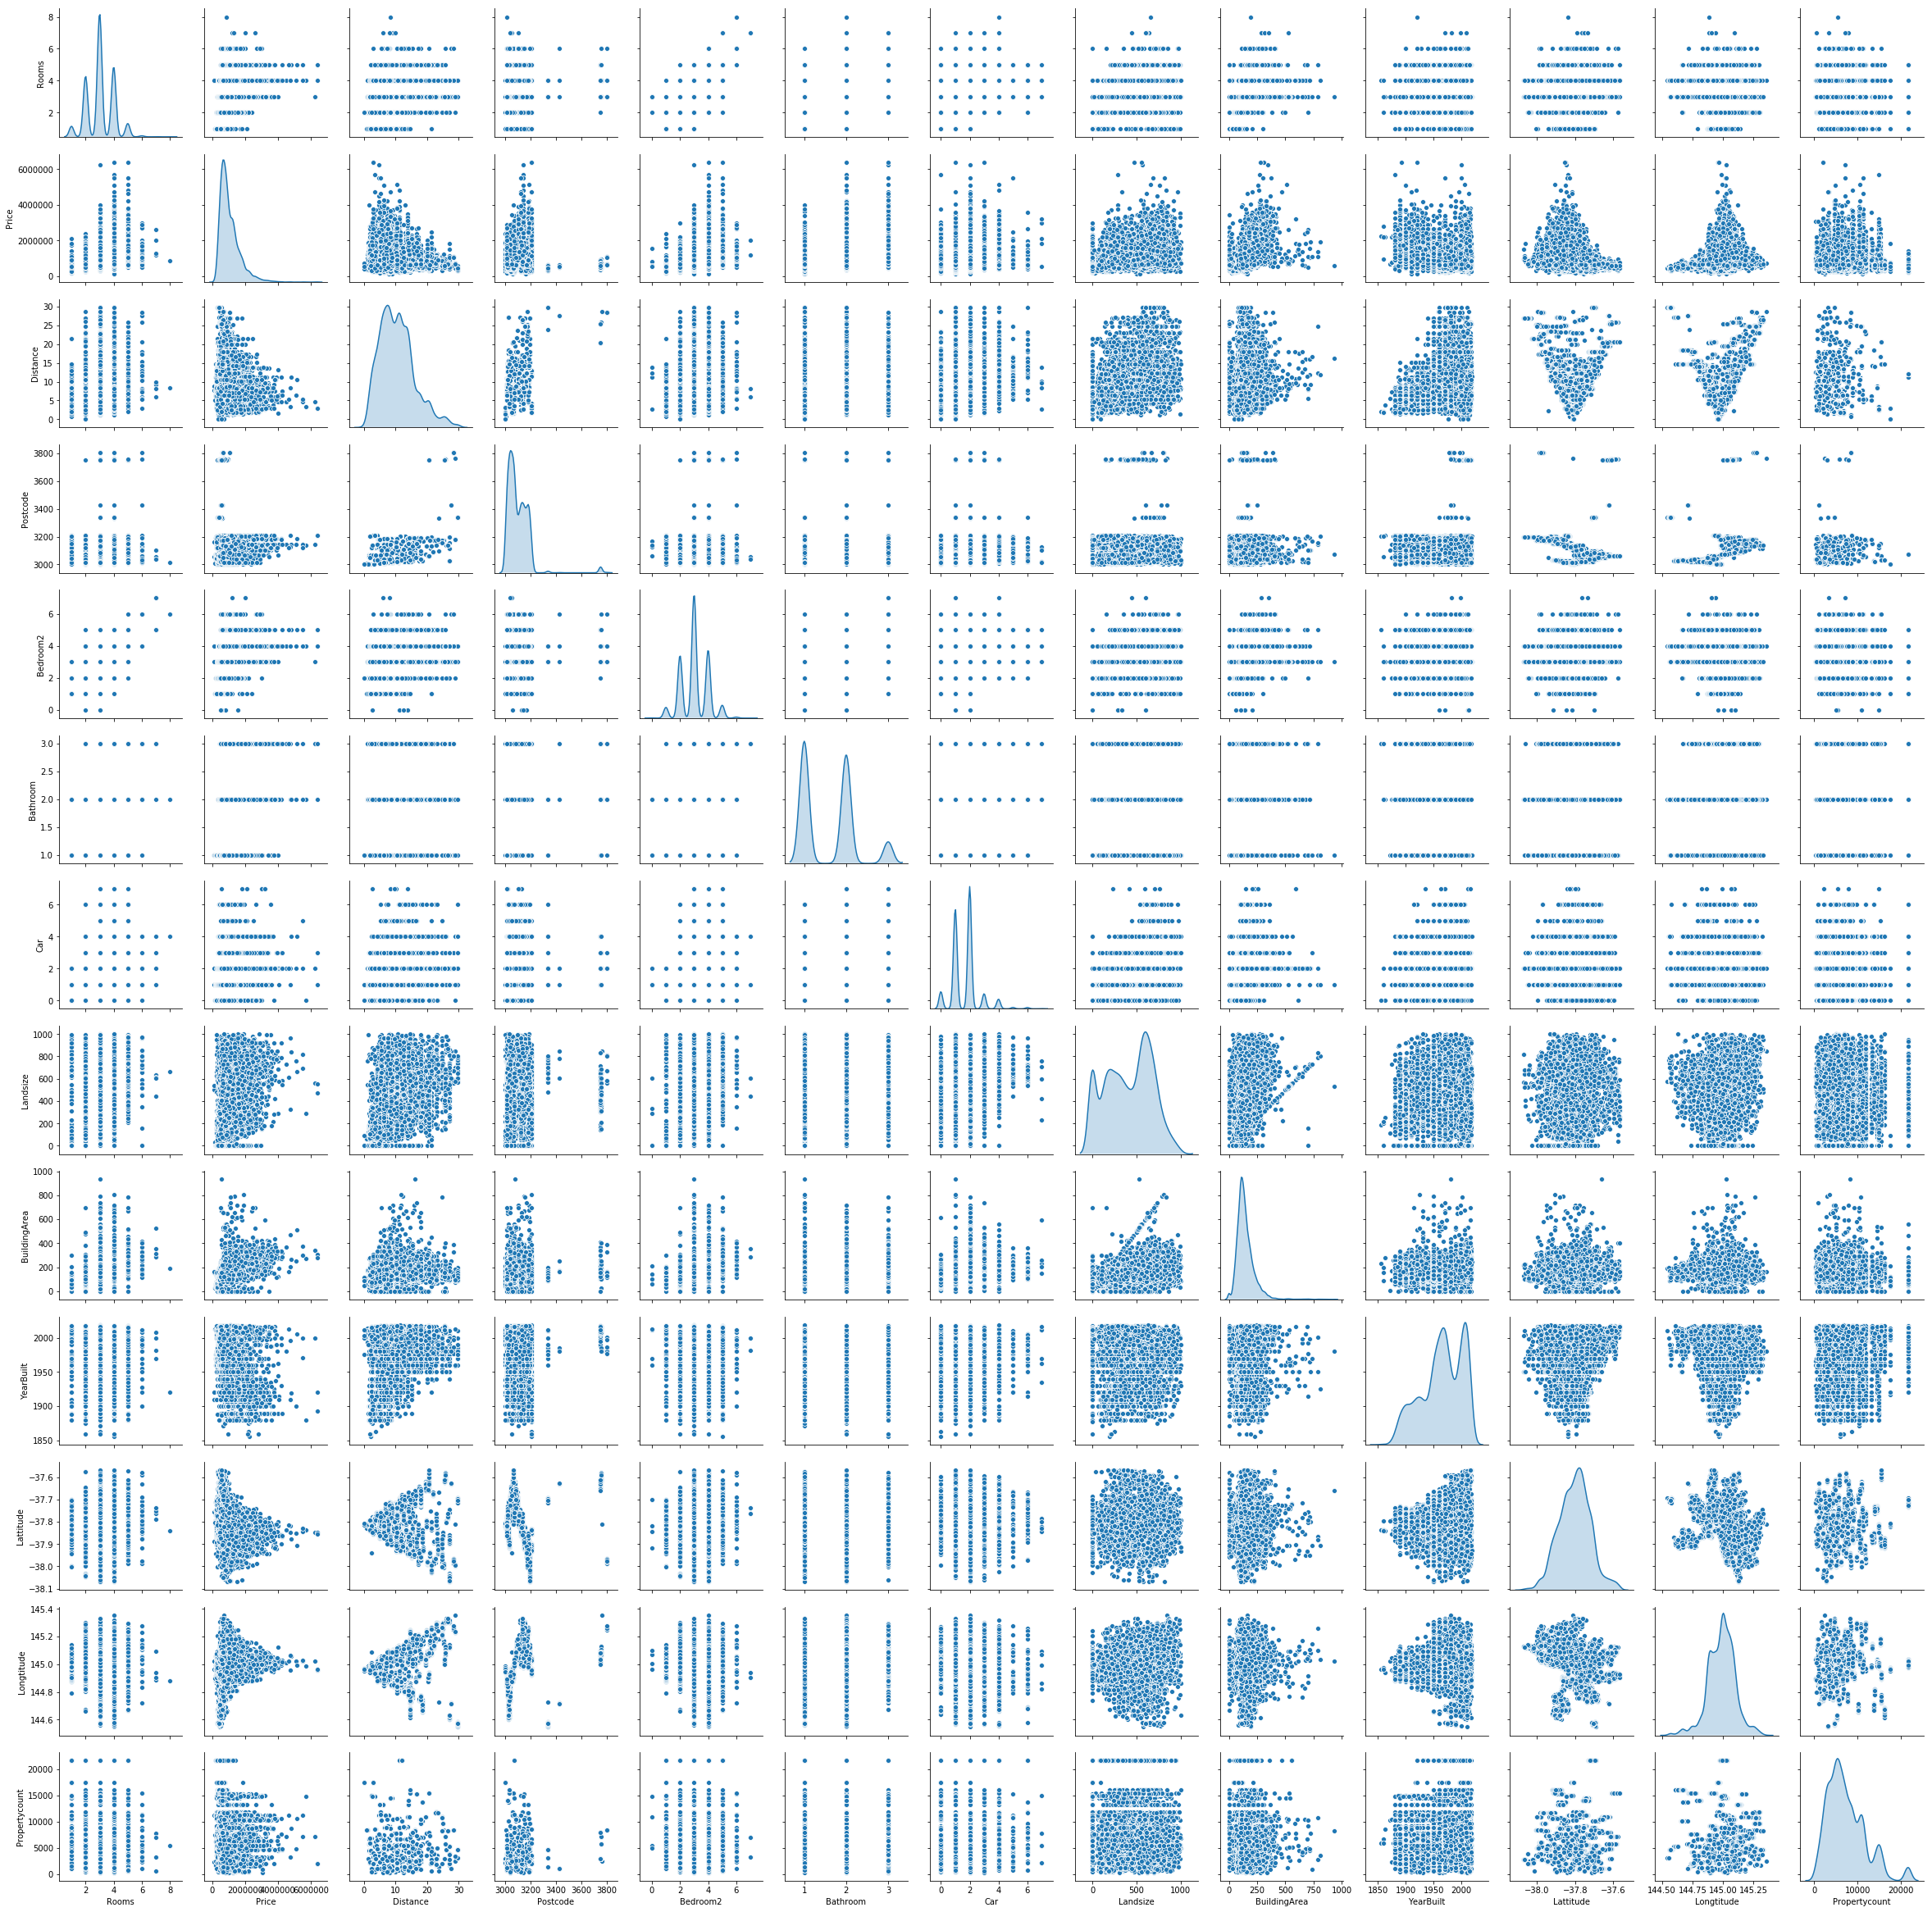

In [29]:
sns.pairplot(dataset, diag_kind='kde')

In [0]:

#encoding categorical variable and removing duplicate columns
dataset = dataset.drop(columns=['Suburb', 'Address', 'Bedroom2', 'SellerG'])

dataset['Type'] = dataset['Type'].replace({'h': 'House', 'u': 'Unit', 't':'TownHouse'})
dataset= pd.concat([dataset.drop('Type', axis=1), pd.get_dummies(dataset['Type']).astype('category')], axis=1)
dataset= pd.concat([dataset.drop('Method', axis=1), pd.get_dummies(dataset['Method']).astype('category')], axis=1)
dataset= pd.concat([dataset.drop('CouncilArea', axis=1), pd.get_dummies(dataset['CouncilArea']).astype('category')], axis=1)
dataset= pd.concat([dataset.drop('Regionname', axis=1), pd.get_dummies(dataset['Regionname']).astype('category')], axis=1)
dataset['Date']= pd.to_datetime(dataset.Date)
dataset['Date']= dataset['Date'].dt.year




In [0]:
#creating copy of dataset for different model for comparasion and selecting 
dataset_linear= dataset
dataset_tree=dataset
dataset_forest=dataset

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 150525.013850
Best score using built-in LassoCV: 0.543986


Text(0.5, 1.0, 'Feature importance using Lasso Model')

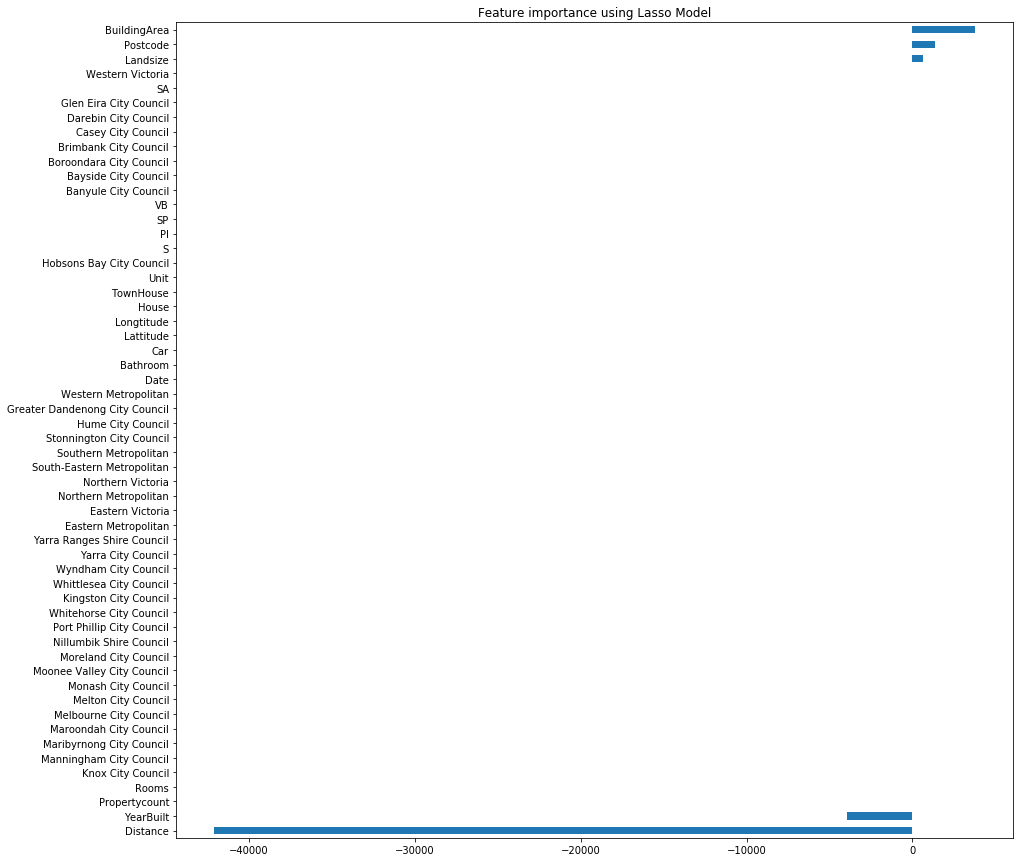

In [54]:
#Preparing label and feature for model and selecting best features
#linear
X_lin = dataset.loc[:,dataset.columns != 'Price']

Y_lin = dataset.loc[:,['Price']]

reg = LassoCV()
reg.fit(X_lin, Y_lin)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_lin, Y_lin))
coef = pd.Series(reg.coef_, index = X_lin.columns)
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 15)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [0]:
#selecting best features

X_lin = X_lin.loc[:,['YearBuilt', 'Distance', 'Landsize', 'Postcode', 'BuildingArea']]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[4.90021917e-02 4.75654036e-02 6.18954602e-02 4.75347377e-02
 3.59831450e-02 5.74650408e-02 1.04258443e-01 1.13556978e-01
 1.01694623e-01 1.11274922e-01 1.12644439e-01 5.49492900e-02
 4.25469586e-03 4.75433933e-03 3.41116819e-03 6.43836177e-03
 6.87064326e-03 1.72398613e-03 6.05437549e-03 3.71067807e-03
 2.12050400e-03 2.29773801e-03 3.25661041e-03 1.65625511e-03
 2.34785875e-04 3.45647024e-03 3.13108995e-03 4.50064869e-04
 2.19592496e-03 1.31066808e-03 1.63404826e-03 8.42783067e-04
 1.40830884e-03 2.77071527e-03 7.97775865e-04 3.67250952e-03
 5.11533016e-04 2.64657308e-03 2.77984210e-03 3.95661357e-03
 3.21777284e-04 2.46250602e-03 3.12815057e-03 1.27879018e-03
 6.34175096e-04 6.24395846e-04 2.34838167e-03 1.59537954e-04
 2.50261190e-03 1.46786986e-04 3.51777199e-03 1.74993407e-04
 1.07092609e-03 2.16863359e-03 3.18667773e-03 1.00147416e-04]


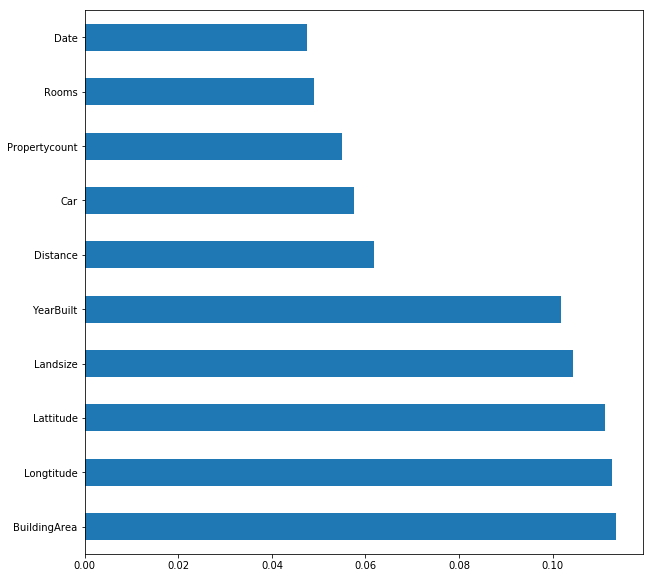

In [35]:
#Preparing label and feature for model and selecting best features
#decission tree
X_tree = dataset.loc[:,dataset.columns != 'Price']

Y_tree = dataset.loc[:,['Price']]

model = ExtraTreesClassifier()
model.fit(X_tree,Y_tree.values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_tree.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()



In [0]:
#Selecting best features for decission tree

X_tree = X_tree.loc[:,['Lattitude','Longtitude','Car','Propertycount','Date',
                       'Rooms','YearBuilt', 'Distance', 'Landsize', 'Postcode', 'BuildingArea']]

In [0]:
#Preparing label and feature for model and selecting best features
#random forest
X_rf = dataset.loc[:,dataset.columns != 'Price']

Y_rf = dataset.loc[:,['Price']]

sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel.fit(X_rf, Y_rf.values.ravel())
sel.get_support()
selected_feat= X_rf.columns[(sel.get_support())]
print(selected_feat)


In [0]:
#Selecting best features for decission tree
X_rf = X_rf.loc[:,['Rooms', 'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude','Propertycount']]

In [0]:
#Splitting dataset into test and train for each model

Lin_train_X,Lin_test_X,Lin_train_y,Lin_test_y = train_test_split(X_lin,Y_lin,test_size=0.25 )
Tree_train_X,Tree_test_X,Tree_train_y,Tree_test_y = train_test_split(X_tree,Y_tree,test_size=0.25 )
Rf_train_X,Rf_test_X,Rf_train_y,Rf_test_y = train_test_split(X_rf,Y_rf,test_size=0.25 )

In [40]:
#Creating multiple linear regression model

Lreg = linear_model.LinearRegression()
Lreg.fit(Lin_train_X, Lin_train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#creating decission tree regression model
dtreg = DecisionTreeRegressor(random_state=564)
dtreg.fit(Tree_train_X, Tree_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=564, splitter='best')

In [42]:
#creating random forest model 
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(Rf_train_X, Rf_train_y.values.ravel())


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
#linear regression prediction
lin_predict= Lreg.predict(Lin_test_X)

absolute_lin = mean_absolute_error(Lin_test_y,lin_predict)

absolute_lin

279132.71436657285

In [44]:
#decission tree prediction

dt_predict= dtreg.predict(Tree_test_X)

absolute_dt = mean_absolute_error(Tree_test_y,dt_predict)

absolute_dt

216259.94224180127

In [45]:
# random forest prediction

rf_predict = rf.predict(Rf_test_X)
absolute_rf= mean_absolute_error(Rf_test_y,rf_predict)
absolute_rf


148108.06785262102

In [0]:
# hypothesis testing to see if any of the above model can predict house prices within 500000 with 95% confidence.

In [47]:
# hypothesis test usinglinear model

lin_diff = Lin_test_y
lin_diff['Prediction']= lin_predict
lin_diff['Difference']= abs(lin_diff.Price- lin_diff.Prediction)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [48]:
lin_predicted_mean = np.mean(lin_diff.Difference)

tset, pval = ttest_1samp(lin_diff.Difference, 50000)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis because we cannot predict prices with 95% accuracy that prices will be within +-50,000")
else:
  print("we are accepting null hypothesis because we cannot predict prices with 95% accuracy that prices will be within +-50,000")

p-values 9.821309150679314e-190
 we are rejecting null hypothesis because we cannot predict prices with 95% accuracy that prices will be within +-50,000


In [49]:
# hypothesis test using Decission tree model

dt_diff = Tree_test_y
dt_diff['Prediction']= dt_predict
dt_diff['Difference']= abs(dt_diff.Price- dt_diff.Prediction)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
dt_predicted_mean = np.mean(dt_diff.Difference)

tset, pval = ttest_1samp(dt_diff.Difference, 50000)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis because we cannot predict prices with 95% accuracy that prices will be within +-50,000 ")
else:
  print("we are accepting null hypothesisbecause we can predict prices with 95% accuracy that prices will be within +-50,000")

p-values 1.3072652746480929e-120
 we are rejecting null hypothesis because we cannot predict prices with 95% accuracy that prices will be within +-50,000 


In [51]:
# hypothesis test usinglinear model

rf_diff = Rf_test_y
rf_diff['Prediction']= rf_predict
rf_diff['Difference']= rf_diff.Price- rf_diff.Prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [52]:
rf_predicted_mean = np.mean(rf_diff.Difference)

tset, pval = ttest_1samp(rf_diff.Difference, 50000)
print('p-values',pval)
if pval < 0.050:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis because we cannot predict prices with 95% accuracy that prices will be within +-50,000")
else:
  print("we are accepting null hypothesis because we can predict prices with 95% accuracy that prices will be within +-50,000")

p-values 5.530044512702009e-18
 we are rejecting null hypothesis because we cannot predict prices with 95% accuracy that prices will be within +-50,000
